In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!pip install finance-datareader

In [3]:
import FinanceDataReader as fdr
A = fdr.DataReader('003070',  '2020-05-01', '2021-11-30')

#Prophet

In [4]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
A['y'] = A['Close']
A['ds'] = A.index

In [5]:
#prophet 객체 선언 및 학습
m = Prophet(changepoint_prior_scale=0.8, #보통 changepoint_prior_scale= 0.05로 되어있음 
            yearly_seasonality=True,
            daily_seasonality=True
            )
m.fit(A)
future = m.make_future_dataframe(periods=30) #30일 예측
forecast = m.predict(future)#predict로 예측을 진행합니다. predict 안에는 이전 단계에서 만들어준 future 데이터프레임을 입력합니다.
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-30:-1] #예측 30일을 출력 합니다

,ds,yhat,yhat_lower,yhat_upper
392,2021-12-01,22685.238718,21671.625755,23796.379005
393,2021-12-02,22479.661565,21375.585732,23550.242208
394,2021-12-03,22331.536931,21329.951326,23465.112276
395,2021-12-04,22160.948056,21106.605089,23254.633877
396,2021-12-05,21944.941919,20883.371702,23033.632115
397,2021-12-06,21620.577462,20525.495307,22719.217563
398,2021-12-07,21356.727061,20317.476192,22479.086151
399,2021-12-08,21178.844839,19990.838428,22288.986382
400,2021-12-09,20907.998834,19825.869137,22042.796907
401,2021-12-10,20698.320196,19494.208526,21819.678413


시각화

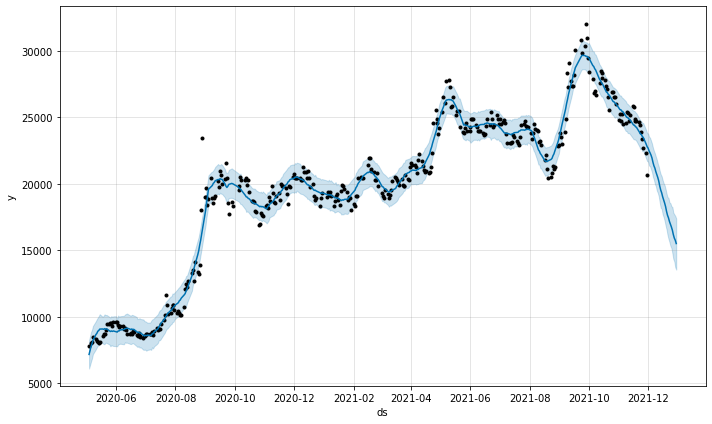

In [6]:
#plot은 트렌드와 함께 예측된 결과물을 시각화하여 보여줍니다.
fig = m.plot(forecast)

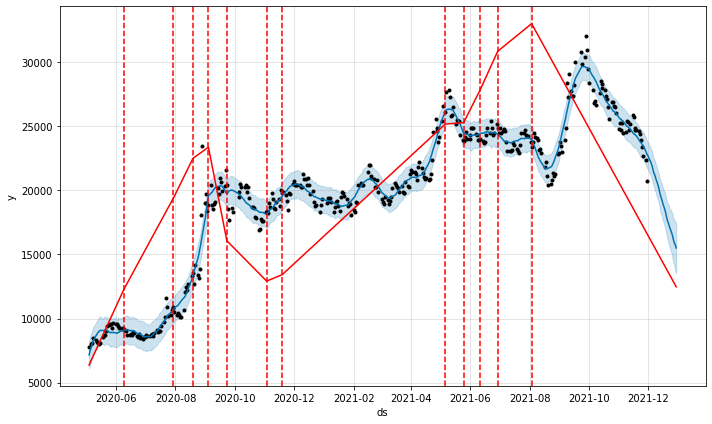

In [7]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [8]:
Close = A['Close']
yhat = forecast[['yhat']].iloc[0:392]
# RMSE
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(Close, yhat) 
np.sqrt(MSE)

834.6417813996362

In [9]:
B = fdr.DataReader('003070', '2019-12-01', '2019-12-31') # test
B

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-12-02,9390,9400,9190,9320,23086,0.001074
2019-12-03,9320,9390,9150,9340,14981,0.002146
2019-12-04,9360,9390,9130,9130,18797,-0.022484
2019-12-05,9060,9220,9060,9090,14406,-0.004381
2019-12-06,9090,9400,9090,9380,22696,0.031903
2019-12-09,9380,9610,9320,9520,16962,0.014925
2019-12-10,9600,9600,9410,9470,6775,-0.005252
2019-12-11,9470,9580,9390,9550,8908,0.008448
2019-12-12,9510,9950,9510,9760,83975,0.021990


In [10]:
B.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2019-12-02 to 2019-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     int64  
 1   High    20 non-null     int64  
 2   Low     20 non-null     int64  
 3   Close   20 non-null     int64  
 4   Volume  20 non-null     int64  
 5   Change  20 non-null     float64
dtypes: float64(1), int64(5)
memory usage: 1.1 KB


In [11]:
B['ds'] = B.index

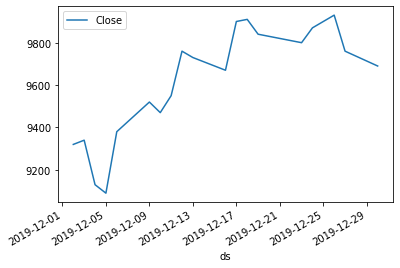

In [12]:
B.plot(x='ds', y='Close')

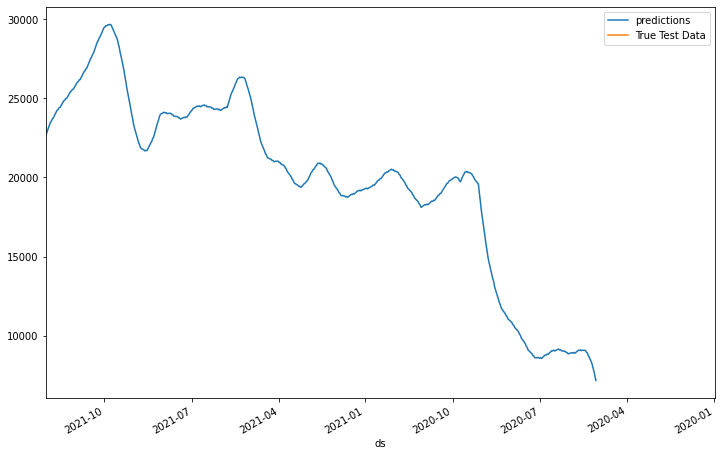

In [13]:
#m.plot(forecast)
ax = forecast[['yhat']].iloc[-1:-30]
ax=forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
B.plot(x='ds', y='Close', legend=True, label='True Test Data',ax=ax,xlim=('2021-12-01', '2019-12-31'))